In [1]:
import ast
import collections
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle
import seaborn as sns
# import tensorflow as tf
import time
from sklearn.metrics import confusion_matrix
from timeit import default_timer as timer
from tensorflow.compat.v2.keras.models import load_model
from tensorflow.compat.v2.keras.utils import plot_model
from tensorflow import enable_eager_execution
enable_eager_execution()

c:\users\cesar\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\cesar\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\cesar\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\cesar\appd

In [2]:
X_train = pd.read_csv("dataset_train.csv")
X_val = pd.read_csv('dataset_validation.csv')
X_test = pd.read_csv('dataset_test.csv')

X_train = X_train.iloc[:,1:31]
X_val = X_val.iloc[:,1:31]
X_test = X_test.iloc[:,1:31]

y_train = np.loadtxt("labels_train.csv", delimiter=",")
y_val = np.loadtxt("labels_validation.csv", delimiter=",")
y_test = np.loadtxt("labels_test.csv", delimiter=",")

labels = ['a', 'b', 'c', 'd', 'e', 'espaço', 'f', 'g', 'h', 'i', 'j', 'k', 
          'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

In [5]:
# Multilayer Perceptron

directory = 'variacao_neuronios_sigmoide'
arquivos = os.listdir(directory)

results = {}
for i in range(2, len(arquivos), 3):
    arq_name = arquivos[i]
    num_neurons = int(arq_name.split('_')[0])
    with open(directory+'/'+arq_name, 'rb') as fp:
        data = pickle.load(fp)
    results[num_neurons] = data
    
# networks = {}
# for i in range(1, len(arquivos), 3):
#     arq_name = arquivos[i]
#     num_neurons = int(arq_name.split('_')[0])
#     model = load_model(directory+'/'+arq_name)
#     networks[num_neurons] = model

x = []
acc = [] 
acc_val = []
acc_test = []

loss = []
loss_val = []
loss_test = []

od = collections.OrderedDict(sorted(results.items()))
for key,value in od.items():
#     print(key, value)
    x.append(key)
    acc.append(value[0][0])
    acc_val.append(value[0][1])
    acc_test.append(value[0][2])
    loss.append(value[1][0])
    loss_val.append(value[1][1])
    loss_test.append(value[1][2])

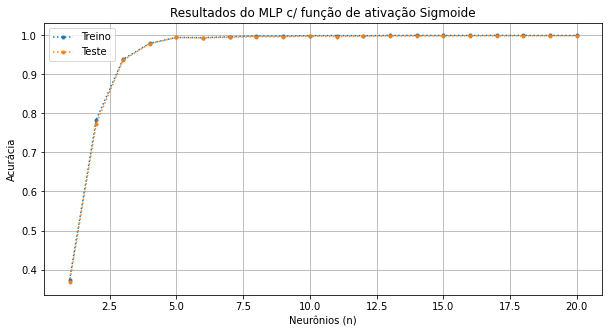

In [12]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.plot(x, acc, linestyle=':', marker='.')
plt.plot(x, acc_test, linestyle=':', marker='.')
plt.ylabel('Acurácia')
plt.xlabel('Neurônios (n)')
plt.legend(['Treino', 'Teste'])
plt.title('Resultados do MLP c/ função de ativação Sigmoide')
plt.grid()
plt.show()

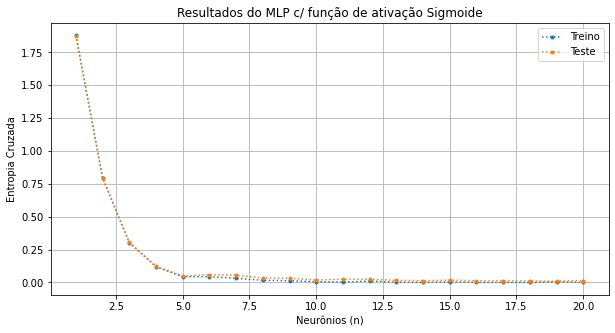

In [13]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.plot(x, loss, linestyle=':', marker='.')
plt.plot(x, loss_test, linestyle=':', marker='.')
plt.ylabel('Entropia Cruzada')
plt.xlabel('Neurônios (n)')
plt.legend(['Treino', 'Teste'])
plt.title('Resultados do MLP c/ função de ativação Sigmoide')
plt.grid()
plt.show()

Text(0.5, 1.0, 'MLP c/ ativação sigmoide | Teste | Utilizando 17 neurônios na camada escondida')

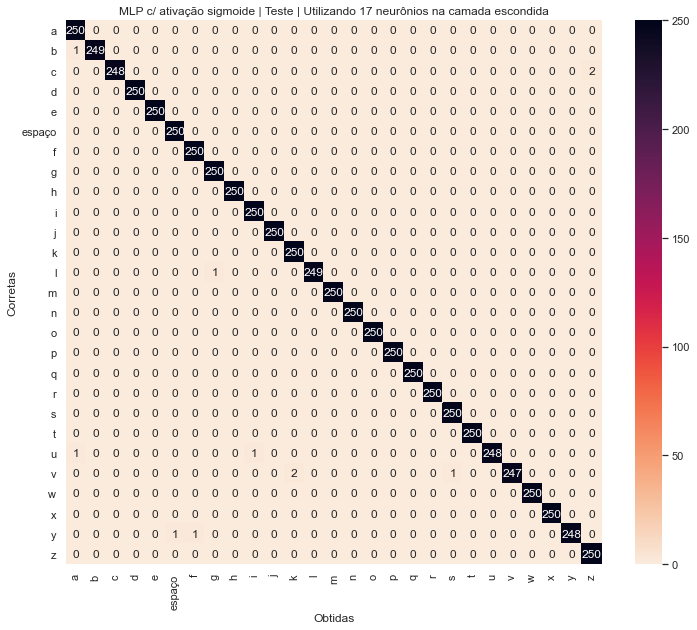

In [8]:
model = networks[17] # rede com 8 neurônios

y_pred = model.predict(X_test)
y_true = [i.argmax() for i in y_test]
y_pred2 = [i.argmax() for i in y_pred]

cm = confusion_matrix(y_true, y_pred2)

sns.set()
fig, ax = plt.subplots(figsize=(12,10))
# ax.set_title('KNN / Teste / Utilizando K-Means')
ax = sns.heatmap(cm, xticklabels=labels, yticklabels=labels, ax=ax, cmap=sns.cm.rocket_r, annot=True, fmt="d")
ax.set_ylabel('Corretas')
ax.set_xlabel('Obtidas')
ax.set_title('MLP c/ ativação sigmoide | Teste | Utilizando 17 neurônios na camada escondida')

In [9]:
# Multilayer Perceptron

directory = 'variacao_neuronios_relu'
arquivos = os.listdir(directory)

results = {}
for i in range(2, len(arquivos), 3):
    arq_name = arquivos[i]
    num_neurons = int(arq_name.split('_')[0])
    with open(directory+'/'+arq_name, 'rb') as fp:
        data = pickle.load(fp)
    results[num_neurons] = data
    
networks = {}
for i in range(1, len(arquivos), 3):
    arq_name = arquivos[i]
    num_neurons = int(arq_name.split('_')[0])
    model = load_model(directory+'/'+arq_name)
    networks[num_neurons] = model

x = []
acc = [] 
acc_val = []
acc_test = []

loss = []
loss_val = []
loss_test = []

od = collections.OrderedDict(sorted(results.items()))
for key,value in od.items():
#     print(key, value)
    x.append(key)
    acc.append(value[0][0])
    acc_val.append(value[0][1])
    acc_test.append(value[0][2])
    loss.append(value[1][0])
    loss_val.append(value[1][1])
    loss_test.append(value[1][2])

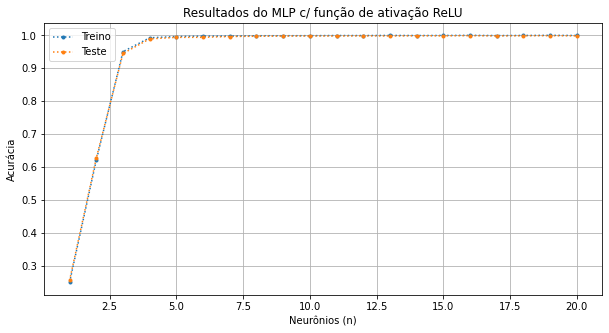

In [28]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.plot(x, acc, linestyle=':', marker='.')
plt.plot(x, acc_test, linestyle=':', marker='.')
plt.ylabel('Acurácia')
plt.xlabel('Neurônios (n)')
plt.legend(['Treino', 'Teste'])
plt.title('Resultados do MLP c/ função de ativação ReLU')
plt.grid()
plt.show()

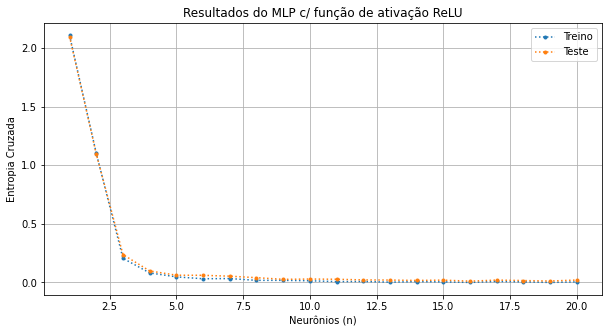

In [25]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.plot(x, loss, linestyle=':', marker='.')
plt.plot(x, loss_test, linestyle=':', marker='.')
plt.ylabel('Entropia Cruzada')
plt.xlabel('Neurônios (n)')
plt.legend(['Treino', 'Teste'])
plt.title('Resultados do MLP c/ função de ativação ReLU')
plt.grid()
plt.show()

Text(0.5, 1.0, 'MLP c/ ativação ReLU | Teste | Utilizando 16 neurônios na camada escondida')

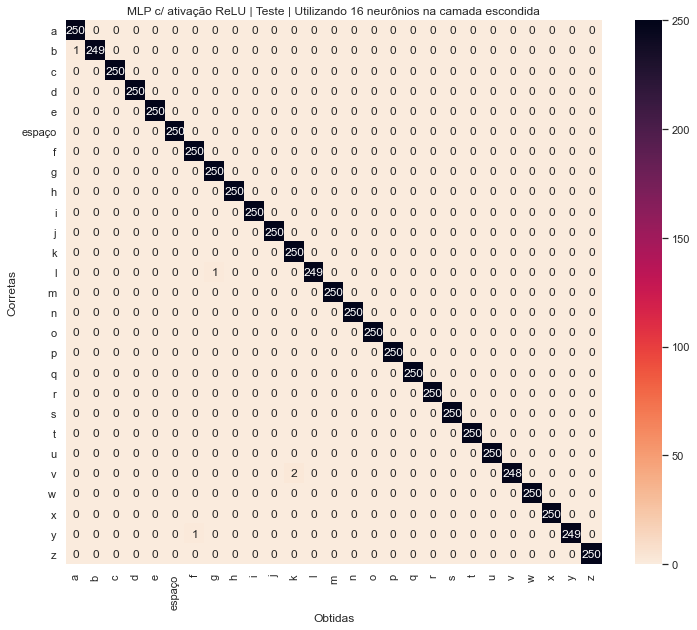

In [10]:
model = networks[16] # rede com 8 neurônios

y_pred = model.predict(X_test)
y_true = [i.argmax() for i in y_test]
y_pred2 = [i.argmax() for i in y_pred]

cm = confusion_matrix(y_true, y_pred2)

sns.set()
fig, ax = plt.subplots(figsize=(12,10))
# ax.set_title('KNN / Teste / Utilizando K-Means')
ax = sns.heatmap(cm, xticklabels=labels, yticklabels=labels, ax=ax, cmap=sns.cm.rocket_r, annot=True, fmt="d")
ax.set_ylabel('Corretas')
ax.set_xlabel('Obtidas')
ax.set_title('MLP c/ ativação ReLU | Teste | Utilizando 16 neurônios na camada escondida')

In [7]:
# RBFN com beta=1

directory = 'variacao_rbfn_1'
arquivos = os.listdir(directory)

results = {}
for i in range(2, len(arquivos), 3):
    arq_name = arquivos[i]
    num_neurons = int(arq_name.split('_')[0])
    with open(directory+'/'+arq_name, 'rb') as fp:
        data = pickle.load(fp)
    results[num_neurons] = data
    
networks = {}
for i in range(1, len(arquivos), 3):
    arq_name = arquivos[i]
    num_neurons = int(arq_name.split('_')[0])
    print(directory+'/'+arq_name)
    model = load_model(directory+'/'+arq_name, custom_objects={'RBFLayer': RBFLayer})
    networks[num_neurons] = model

x = []
acc = [] 
acc_val = []
acc_test = []

loss = []
loss_val = []
loss_test = []

od = collections.OrderedDict(sorted(results.items()))
for key,value in od.items():
#     print(key, value)
    x.append(key)
    acc.append(value[0][0])
    acc_val.append(value[0][1])
    acc_test.append(value[0][2])
    loss.append(value[1][0])
    loss_val.append(value[1][1])
    loss_test.append(value[1][2])

variacao_rbfn_1/100_network.h5
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
variacao_rbfn_1/101_network.h5
variacao_rbfn_1/102_network.h5
variacao_rbfn_1/103_network.h5
variacao_rbfn_1/104_network.h5
variacao_rbfn_1/105_network.h5
variacao_rbfn_1/106_network.h5
variacao_rbfn_1/107_network.h5


variacao_rbfn_1/108_network.h5
variacao_rbfn_1/109_network.h5
variacao_rbfn_1/10_network.h5
variacao_rbfn_1/110_network.h5
variacao_rbfn_1/111_network.h5
variacao_rbfn_1/112_network.h5
variacao_rbfn_1/113_network.h5
variacao_rbfn_1/114_network.h5
variacao_rbfn_1/115_network.h5


variacao_rbfn_1/116_network.h5
variacao_rbfn_1/117_network.h5
variacao_rbfn_1/118_network.h5
variacao_rbfn_1/119_network.h5
variacao_rbfn_1/11_network.h5
variacao_rbfn_1/120_network.h5
variacao_rbfn_1/121_network.h5
variacao_rbfn_1/122_network.h5


variacao_rbfn_1/123_network.h5
variacao_rbfn_1/124_network.h5
variacao_rbfn_1/125_network.h5
variacao_rbfn_1/126_network.h5
variacao_rbfn_1/127_network.h5
variacao_rbfn_1/128_network.h5
variacao_rbfn_1/129_network.h5
variacao_rbfn_1/12_network.h5
variacao_rbfn_1/130_network.h5


variacao_rbfn_1/131_network.h5
variacao_rbfn_1/132_network.h5
variacao_rbfn_1/133_network.h5
variacao_rbfn_1/134_network.h5
variacao_rbfn_1/135_network.h5
variacao_rbfn_1/136_network.h5
variacao_rbfn_1/137_network.h5
variacao_rbfn_1/138_network.h5


variacao_rbfn_1/139_network.h5
variacao_rbfn_1/13_network.h5
variacao_rbfn_1/140_network.h5
variacao_rbfn_1/141_network.h5
variacao_rbfn_1/142_network.h5
variacao_rbfn_1/143_network.h5
variacao_rbfn_1/144_network.h5
variacao_rbfn_1/145_network.h5
variacao_rbfn_1/146_network.h5


variacao_rbfn_1/147_network.h5
variacao_rbfn_1/148_network.h5
variacao_rbfn_1/149_network.h5
variacao_rbfn_1/14_network.h5
variacao_rbfn_1/150_network.h5
variacao_rbfn_1/151_network.h5
variacao_rbfn_1/152_network.h5
variacao_rbfn_1/153_network.h5


variacao_rbfn_1/154_network.h5
variacao_rbfn_1/155_network.h5
variacao_rbfn_1/156_network.h5
variacao_rbfn_1/157_network.h5
variacao_rbfn_1/158_network.h5
variacao_rbfn_1/159_network.h5
variacao_rbfn_1/15_network.h5
variacao_rbfn_1/160_network.h5
variacao_rbfn_1/161_network.h5


variacao_rbfn_1/162_network.h5
variacao_rbfn_1/163_network.h5
variacao_rbfn_1/164_network.h5
variacao_rbfn_1/165_network.h5
variacao_rbfn_1/166_network.h5
variacao_rbfn_1/167_network.h5
variacao_rbfn_1/168_network.h5
variacao_rbfn_1/169_network.h5


variacao_rbfn_1/16_network.h5
variacao_rbfn_1/170_network.h5
variacao_rbfn_1/171_network.h5
variacao_rbfn_1/172_network.h5
variacao_rbfn_1/173_network.h5
variacao_rbfn_1/174_network.h5
variacao_rbfn_1/175_network.h5
variacao_rbfn_1/176_network.h5
variacao_rbfn_1/177_network.h5


variacao_rbfn_1/178_network.h5
variacao_rbfn_1/179_network.h5
variacao_rbfn_1/17_network.h5
variacao_rbfn_1/180_network.h5
variacao_rbfn_1/181_network.h5
variacao_rbfn_1/182_network.h5
variacao_rbfn_1/183_network.h5
variacao_rbfn_1/184_network.h5


variacao_rbfn_1/185_network.h5
variacao_rbfn_1/186_network.h5
variacao_rbfn_1/187_network.h5
variacao_rbfn_1/188_network.h5
variacao_rbfn_1/189_network.h5
variacao_rbfn_1/18_network.h5
variacao_rbfn_1/190_network.h5
variacao_rbfn_1/191_network.h5
variacao_rbfn_1/192_network.h5


variacao_rbfn_1/193_network.h5
variacao_rbfn_1/194_network.h5
variacao_rbfn_1/195_network.h5
variacao_rbfn_1/196_network.h5
variacao_rbfn_1/197_network.h5
variacao_rbfn_1/198_network.h5
variacao_rbfn_1/199_network.h5
variacao_rbfn_1/19_network.h5


variacao_rbfn_1/1_network.h5
variacao_rbfn_1/200_network.h5
variacao_rbfn_1/201_network.h5
variacao_rbfn_1/202_network.h5
variacao_rbfn_1/203_network.h5
variacao_rbfn_1/204_network.h5
variacao_rbfn_1/205_network.h5
variacao_rbfn_1/206_network.h5
variacao_rbfn_1/207_network.h5


variacao_rbfn_1/208_network.h5
variacao_rbfn_1/209_network.h5
variacao_rbfn_1/20_network.h5
variacao_rbfn_1/210_network.h5
variacao_rbfn_1/211_network.h5
variacao_rbfn_1/212_network.h5
variacao_rbfn_1/213_network.h5
variacao_rbfn_1/214_network.h5


variacao_rbfn_1/215_network.h5
variacao_rbfn_1/216_network.h5
variacao_rbfn_1/217_network.h5
variacao_rbfn_1/218_network.h5
variacao_rbfn_1/219_network.h5
variacao_rbfn_1/21_network.h5
variacao_rbfn_1/220_network.h5
variacao_rbfn_1/221_network.h5
variacao_rbfn_1/222_network.h5


variacao_rbfn_1/223_network.h5
variacao_rbfn_1/224_network.h5
variacao_rbfn_1/225_network.h5
variacao_rbfn_1/226_network.h5
variacao_rbfn_1/227_network.h5
variacao_rbfn_1/228_network.h5
variacao_rbfn_1/229_network.h5
variacao_rbfn_1/22_network.h5


variacao_rbfn_1/230_network.h5
variacao_rbfn_1/231_network.h5
variacao_rbfn_1/232_network.h5
variacao_rbfn_1/233_network.h5
variacao_rbfn_1/234_network.h5
variacao_rbfn_1/235_network.h5
variacao_rbfn_1/236_network.h5
variacao_rbfn_1/237_network.h5
variacao_rbfn_1/238_network.h5


variacao_rbfn_1/239_network.h5
variacao_rbfn_1/23_network.h5
variacao_rbfn_1/240_network.h5
variacao_rbfn_1/241_network.h5
variacao_rbfn_1/242_network.h5
variacao_rbfn_1/243_network.h5
variacao_rbfn_1/244_network.h5
variacao_rbfn_1/245_network.h5


variacao_rbfn_1/246_network.h5
variacao_rbfn_1/247_network.h5
variacao_rbfn_1/248_network.h5
variacao_rbfn_1/249_network.h5
variacao_rbfn_1/24_network.h5
variacao_rbfn_1/250_network.h5
variacao_rbfn_1/251_network.h5
variacao_rbfn_1/252_network.h5
variacao_rbfn_1/253_network.h5


variacao_rbfn_1/254_network.h5
variacao_rbfn_1/255_network.h5
variacao_rbfn_1/256_network.h5
variacao_rbfn_1/257_network.h5
variacao_rbfn_1/258_network.h5
variacao_rbfn_1/259_network.h5
variacao_rbfn_1/25_network.h5
variacao_rbfn_1/260_network.h5


variacao_rbfn_1/261_network.h5
variacao_rbfn_1/262_network.h5
variacao_rbfn_1/263_network.h5
variacao_rbfn_1/264_network.h5
variacao_rbfn_1/265_network.h5
variacao_rbfn_1/266_network.h5
variacao_rbfn_1/267_network.h5
variacao_rbfn_1/268_network.h5
variacao_rbfn_1/269_network.h5


variacao_rbfn_1/26_network.h5
variacao_rbfn_1/270_network.h5
variacao_rbfn_1/27_network.h5
variacao_rbfn_1/28_network.h5
variacao_rbfn_1/29_network.h5
variacao_rbfn_1/2_network.h5
variacao_rbfn_1/30_network.h5
variacao_rbfn_1/31_network.h5


variacao_rbfn_1/32_network.h5
variacao_rbfn_1/33_network.h5
variacao_rbfn_1/34_network.h5
variacao_rbfn_1/35_network.h5
variacao_rbfn_1/36_network.h5
variacao_rbfn_1/37_network.h5
variacao_rbfn_1/38_network.h5
variacao_rbfn_1/39_network.h5
variacao_rbfn_1/3_network.h5


variacao_rbfn_1/40_network.h5
variacao_rbfn_1/41_network.h5
variacao_rbfn_1/42_network.h5
variacao_rbfn_1/43_network.h5
variacao_rbfn_1/44_network.h5
variacao_rbfn_1/45_network.h5
variacao_rbfn_1/46_network.h5
variacao_rbfn_1/47_network.h5


variacao_rbfn_1/48_network.h5
variacao_rbfn_1/49_network.h5
variacao_rbfn_1/4_network.h5
variacao_rbfn_1/50_network.h5
variacao_rbfn_1/51_network.h5
variacao_rbfn_1/52_network.h5
variacao_rbfn_1/53_network.h5
variacao_rbfn_1/54_network.h5
variacao_rbfn_1/55_network.h5


variacao_rbfn_1/56_network.h5
variacao_rbfn_1/57_network.h5
variacao_rbfn_1/58_network.h5
variacao_rbfn_1/59_network.h5
variacao_rbfn_1/5_network.h5
variacao_rbfn_1/60_network.h5
variacao_rbfn_1/61_network.h5
variacao_rbfn_1/62_network.h5


variacao_rbfn_1/63_network.h5
variacao_rbfn_1/64_network.h5
variacao_rbfn_1/65_network.h5
variacao_rbfn_1/66_network.h5
variacao_rbfn_1/67_network.h5
variacao_rbfn_1/68_network.h5
variacao_rbfn_1/69_network.h5
variacao_rbfn_1/6_network.h5
variacao_rbfn_1/70_network.h5


variacao_rbfn_1/71_network.h5
variacao_rbfn_1/72_network.h5
variacao_rbfn_1/73_network.h5
variacao_rbfn_1/74_network.h5
variacao_rbfn_1/75_network.h5
variacao_rbfn_1/76_network.h5
variacao_rbfn_1/77_network.h5
variacao_rbfn_1/78_network.h5


variacao_rbfn_1/79_network.h5
variacao_rbfn_1/7_network.h5
variacao_rbfn_1/80_network.h5
variacao_rbfn_1/81_network.h5
variacao_rbfn_1/82_network.h5
variacao_rbfn_1/83_network.h5
variacao_rbfn_1/84_network.h5
variacao_rbfn_1/85_network.h5
variacao_rbfn_1/86_network.h5


variacao_rbfn_1/87_network.h5
variacao_rbfn_1/88_network.h5
variacao_rbfn_1/89_network.h5
variacao_rbfn_1/8_network.h5
variacao_rbfn_1/90_network.h5
variacao_rbfn_1/91_network.h5
variacao_rbfn_1/92_network.h5
variacao_rbfn_1/93_network.h5


variacao_rbfn_1/94_network.h5
variacao_rbfn_1/95_network.h5
variacao_rbfn_1/96_network.h5
variacao_rbfn_1/97_network.h5
variacao_rbfn_1/98_network.h5
variacao_rbfn_1/99_network.h5
variacao_rbfn_1/9_network.h5


In [23]:
x[263]

264

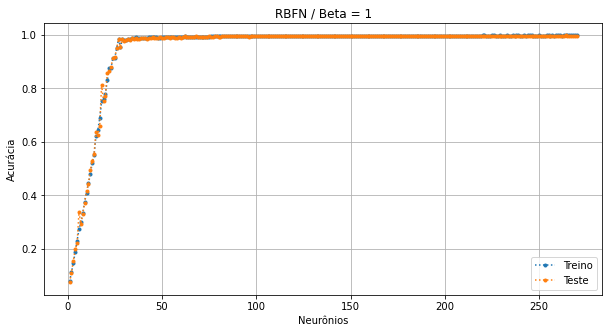

In [35]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.plot(x, acc, linestyle=':', marker='.')
plt.plot(x, acc_test, linestyle=':', marker='.')
plt.ylabel('Acurácia')
plt.xlabel('Neurônios')
plt.title('RBFN / Beta = 1')
plt.legend(['Treino', 'Teste'])
plt.grid()
plt.show()

Text(0.5, 1.0, 'RBFN c/ Beta=1 | Teste | Utilizando 264 neurônios na camada escondida')

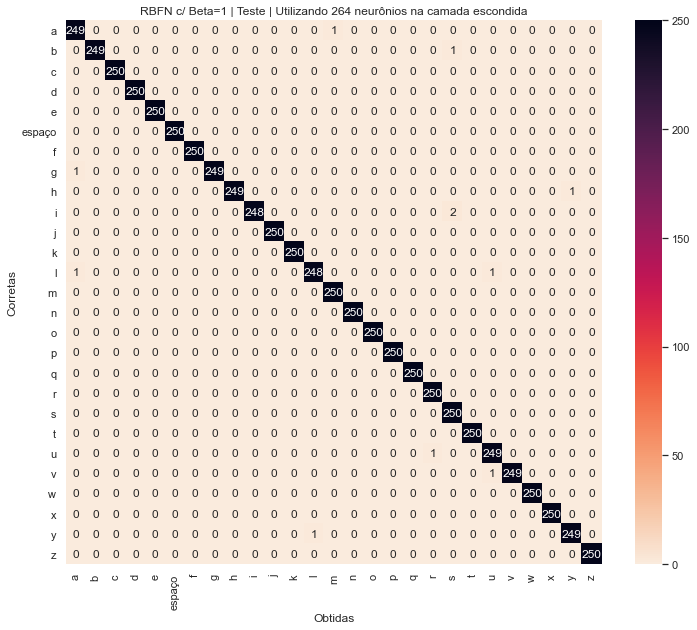

In [24]:
model = networks[264] # rede com 264 neurônios

y_pred = model.predict(X_test)
y_true = [i.argmax() for i in y_test]
y_pred2 = [i.argmax() for i in y_pred]

cm = confusion_matrix(y_true, y_pred2)

sns.set()
fig, ax = plt.subplots(figsize=(12,10))
ax = sns.heatmap(cm, xticklabels=labels, yticklabels=labels, ax=ax, cmap=sns.cm.rocket_r, annot=True, fmt="d")
ax.set_ylabel('Corretas')
ax.set_xlabel('Obtidas')
ax.set_title('RBFN c/ Beta=1 | Teste | Utilizando 264 neurônios na camada escondida')

In [29]:
# RBFN com beta=2

directory = 'variacao_rbfn_2'
arquivos = os.listdir(directory)

results = {}
for i in range(2, len(arquivos), 3):
    arq_name = arquivos[i]
    num_neurons = int(arq_name.split('_')[0])
    with open(directory+'/'+arq_name, 'rb') as fp:
        data = pickle.load(fp)
    results[num_neurons] = data

x = []
acc = [] 
acc_val = []
acc_test = []

loss = []
loss_val = []
loss_test = []

od = collections.OrderedDict(sorted(results.items()))
for key,value in od.items():
#     print(key, value)
    x.append(key)
    acc.append(value[0][0])
    acc_val.append(value[0][1])
    acc_test.append(value[0][2])
    loss.append(value[1][0])
    loss_val.append(value[1][1])
    loss_test.append(value[1][2])

In [30]:
max(acc_test)

0.99807405

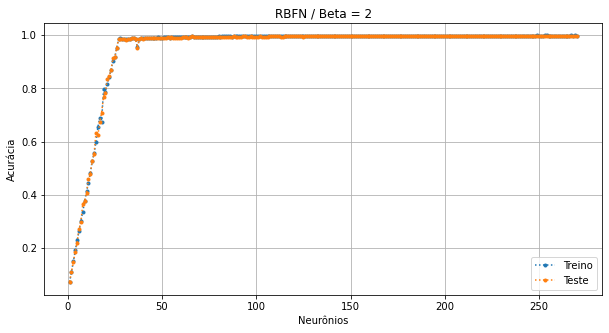

In [77]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.plot(x, acc, linestyle=':', marker='.')
plt.plot(x, acc_test, linestyle=':', marker='.')
plt.ylabel('Acurácia')
plt.xlabel('Neurônios')
plt.title('RBFN / Beta = 2')
plt.legend(['Treino', 'Teste'])
plt.grid()
plt.show()

In [87]:
loss_test[N*1-1]

0.001920724543225434

In [2]:
# RBFN com beta=2

directory = 'variacao_rbfn_05'
arquivos = os.listdir(directory)

results = {}
for i in range(2, len(arquivos), 3):
    arq_name = arquivos[i]
    num_neurons = int(arq_name.split('_')[0])
    with open(directory+'/'+arq_name, 'rb') as fp:
        data = pickle.load(fp)
    results[num_neurons] = data

x = []
acc = [] 
acc_val = []
acc_test = []

loss = []
loss_val = []
loss_test = []

od = collections.OrderedDict(sorted(results.items()))
for key,value in od.items():
#     print(key, value)
    x.append(key)
    acc.append(value[0][0])
    acc_val.append(value[0][1])
    acc_test.append(value[0][2])
    loss.append(value[1][0])
    loss_val.append(value[1][1])
    loss_test.append(value[1][2])

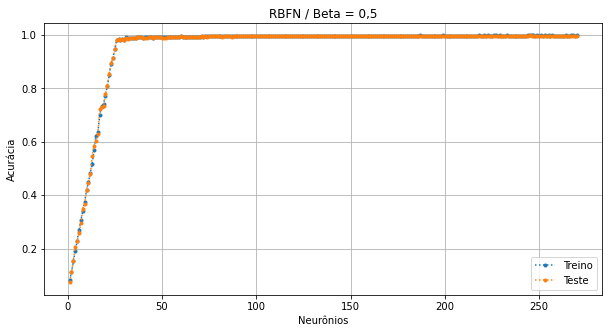

In [4]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.plot(x, acc, linestyle=':', marker='.')
plt.plot(x, acc_test, linestyle=':', marker='.')
plt.ylabel('Acurácia')
plt.xlabel('Neurônios')
plt.title('RBFN / Beta = 0,5')
plt.legend(['Treino', 'Teste'])
plt.grid()
plt.show()

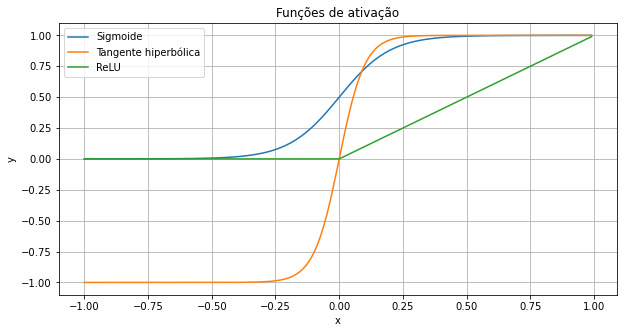

In [33]:
# Gerar gráficos das funções de ativação

x_list = np.arange(-1.0, 1.0, 0.01)

y_linear = 2*x_list
y_sigm = [1/(1+np.exp(-x*10)) for x in x_list]
y_tanh = [(np.exp(x*10) - np.exp(-x*10))/(np.exp(x*10) + np.exp(-x*10)) for x in x_list]
y_relu = [x if x>0 else 0 for x in x_list]

plt.rcParams['figure.figsize'] = [10, 5]
# plt.plot(x_list, y_linear)
plt.plot(x_list, y_sigm)
plt.plot(x_list, y_tanh)
plt.plot(x_list, y_relu)
plt.ylabel('y')
plt.xlabel('x')
plt.title('Funções de ativação')
plt.legend(['Sigmoide', 'Tangente hiperbólica', 'ReLU'])
plt.grid()
plt.show()

In [6]:
from tensorflow.compat.v2.keras import backend as K
from tensorflow.compat.v2.keras.layers import Layer
from tensorflow.compat.v2.keras.initializers import RandomUniform, Initializer, Constant
from sklearn.cluster import KMeans
import numpy as np

class InitCentersRandom(Initializer):
    """ Initializer for initialization of centers of RBF network
        as random samples from the given data set.
    # Arguments
        X: matrix, dataset to choose the centers from (random rows
          are taken as centers)
    """

    def __init__(self, X):
        self.X = X

    def __call__(self, shape, dtype=None):
        assert shape[1] == self.X.shape[1]
        idx = np.random.randint(self.X.shape[0], size=shape[0])
        return self.X[idx, :]


class RBFLayer(Layer):
    """ Layer of Gaussian RBF units.
    # Example
    ```python
        model = Sequential()
        model.add(RBFLayer(10,
                           initializer=InitCentersRandom(X),
                           betas=1.0,
                           input_shape=(1,)))
        model.add(Dense(1))
    ```
    # Arguments
        output_dim: number of hidden units (i.e. number of outputs of the
                    layer)
        initializer: instance of initiliazer to initialize centers
        betas: float, initial value for betas
    """

    def __init__(self, output_dim, initializer=None, betas=1.0, **kwargs):
        self.output_dim = output_dim
        self.init_betas = betas
        self.initializer = initializer
#         if not initializer:
#             self.initializer = RandomUniform(0.0, 1.0)
#         else:
#             self.initializer = initializer
        super(RBFLayer, self).__init__(**kwargs)

    def build(self, input_shape):

        self.centers = self.add_weight(name='centers',
                                       shape=(self.output_dim, input_shape[1]),
                                       initializer=self.initializer,
                                       trainable=True)
        self.betas = self.add_weight(name='betas',
                                     shape=(self.output_dim,),
                                     initializer=Constant(
                                         value=self.init_betas),
                                     # initializer='ones',
                                     trainable=True)

        super(RBFLayer, self).build(input_shape)

    def call(self, x):

        C = K.expand_dims(self.centers)
        H = K.transpose(C-K.transpose(x))
        return K.exp(-self.betas * K.sum(H**2, axis=1))

        # C = self.centers[np.newaxis, :, :]
        # X = x[:, np.newaxis, :]

        # diffnorm = K.sum((C-X)**2, axis=-1)
        # ret = K.exp( - self.betas * diffnorm)
        # return ret

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.output_dim)

    def get_config(self):
        # have to define get_config to be able to use model_from_json
        config = {
            'output_dim': self.output_dim
        }
        base_config = super(RBFLayer, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))


class InitCentersKMeans(Initializer):
    """ Initializer for initialization of centers of RBF network
        by clustering the given data set.
    # Arguments
        X: matrix, dataset
    """

    def __init__(self, X, max_iter=100):
        self.X = X
        self.max_iter = max_iter

    def __call__(self, shape, dtype=None):
        assert shape[1] == self.X.shape[1]
        n_centers = shape[0]
        km = KMeans(n_clusters=n_centers, max_iter=self.max_iter, verbose=0)
        km.fit(self.X)
        return km.cluster_centers_
    

class GetCentersKMeans(Initializer):
    """ Initializer for initialization of centers of RBF network
        by clustering the given data set.
    # Arguments
        X: matrix, dataset
    """
    
#     def __init__(self, X):
#         self.X = X

    def __call__(self, shape, dtype=None):
#         assert shape[1] == self.X.shape[1]
        n_centers = shape[0]
        centroides = np.loadtxt("k-means centroides/aleatorios/"+str(n_centers)+"_clusters.csv", delimiter=",")
        if not len(centroides.shape)==2:
            centroides = np.expand_dims(centroides,axis=0)
        return centroides
    
# a = GetCentersKMeans()
# a((1, 30))